In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

## Step 1: Loading the Dataset

In [113]:
file_path = '/Users/cardigan/Documents/GitHub/Portfolio/Site_Files/Employment_2023.csv'  # Replace with the path where you have stored the dataset
employment_data = pd.read_csv(file_path)

## Step 2: Data Preprocessing

In [114]:
import re

numeric_columns = [
    'Population\naged 16 to 64\n2021/2020\n(thousands)\n[note 1]',
    'Employment\nage 16 and older \nApr 2022 to Mar 2023\n(thousands)\n[note 2]',
    'Unemployment\nage 16 and older\nApr 2022 to Mar 2023\n(thousands)\n[note 2]',
    'Economic inactivity\nage 16 to 64\nApr 2022 to Mar 2023\n(thousands)\n[note 2]',
    'Claimant Count\nApr 2022 to Mar 2023\n[note 4]',
    'Jobs\n2021\n(thousands)\n[note 5]',
    'Earnings by workplace\n2021\n(£)\n[note 7]',
    'Earnings by resident\n2021\n(£)\n[note 7]'
]

# Convert columns with numeric data stored as objects to numeric
for col in numeric_columns:
    employment_data[col] = pd.to_numeric(employment_data[col].astype(str).str.replace(',', ''), errors='coerce')

# Handle missing values
employment_data_clean = employment_data.dropna(subset=numeric_columns).copy()

# Encode categorical variable 'Geography'
employment_data_clean = pd.get_dummies(employment_data_clean, columns=['Geography'], drop_first=True)

In [94]:
print(cleaned_column_names)

{'Population\naged 16 to 64\n2021/2020\n(thousands)\n[note 1]': 'Population aged 16 to 64 2021/2020 (thousands)', 'Employment\nage 16 and older \nApr 2022 to Mar 2023\n(thousands)\n[note 2]': 'Employment age 16 and older  Apr 2022 to Mar 2023 (thousands)', 'Unemployment\nage 16 and older\nApr 2022 to Mar 2023\n(thousands)\n[note 2]': 'Unemployment age 16 and older Apr 2022 to Mar 2023 (thousands)', 'Economic inactivity\nage 16 to 64\nApr 2022 to Mar 2023\n(thousands)\n[note 2]': 'Economic inactivity age 16 to 64 Apr 2022 to Mar 2023 (thousands)', 'Claimant Count\nApr 2022 to Mar 2023\n[note 4]': 'Claimant Count Apr 2022 to Mar 2023', 'Jobs\n2021\n(thousands)\n[note 5]': 'Jobs 2021 (thousands)', 'Earnings by workplace\n2021\n(£)\n[note 7]': 'Earnings by workplace 2021 (£)', 'Earnings by resident\n2021\n(£)\n[note 7]': 'Earnings by resident 2021 (£)'}


## Step 3: Exploratory Data Analysis

In [93]:
# Replace with any exploratory analysis or visualizations you want to perform
employment_data_clean.describe()

,Population\naged 16 to 64\n2021/2020\n(thousands)\n[note 1],Employment\nage 16 and older \nApr 2022 to Mar 2023\n(thousands)\n[note 2],Employment rate\nage 16 to 64\nApr 2022 to Mar 2023\n%\n[note 2],Unemployment\nage 16 and older\nApr 2022 to Mar 2023\n(thousands)\n[note 2],Economic inactivity\nage 16 to 64\nApr 2022 to Mar 2023\n(thousands)\n[note 2],Economic inactivity rate\nage 16 to 64\nApr 2022 to Mar 2023\n%\n[note 2],Claimant Count\nApr 2022 to Mar 2023\n[note 4],Claimant Count proportion\nApr 2022 to Mar 2023\n%\n[note 4],Jobs\n2021\n(thousands)\n[note 5],"Jobs Density\n2021\n%\n[note 5, 6]",Earnings by resident\n2021\n(£)\n[note 7],Earnings by workplace\n2021\n(£)\n[note 7]
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,3.970000e+02,397.000000,397.000000,397.000000,397.000000,397.000000
mean,468.282116,362.937028,74.242569,14.022670,99.838791,22.106549,1.800867e+04,4.037531,400.476071,0.825844,608.372796,585.430730
std,3486.535578,2706.475494,5.978444,100.413926,738.026466,5.590884,1.326716e+05,1.664719,2981.162631,0.704956,81.388872,71.904702
min,34.000000,26.000000,53.900000,1.000000,5.000000,8.600000,7.250000e+02,1.300000,18.000000,0.380000,466.000000,452.000000
25%,57.000000,42.000000,70.700000,2.000000,11.000000,18.100000,1.641000e+03,2.900000,37.000000,0.620000,549.000000,536.000000
50%,64.000000,49.000000,74.900000,2.000000,14.000000,21.700000,2.430000e+03,3.800000,47.000000,0.750000,593.000000,575.000000
75%,72.000000,58.000000,78.300000,3.000000,17.000000,25.600000,3.693000e+03,4.900000,63.000000,0.900000,653.000000,617.000000
max,42175.000000,32681.000000,88.000000,1200.000000,9002.000000,40.600000,1.591395e+06,10.700000,35852.000000,13.720000,934.000000,973.000000


In [13]:
## Step 4: Random Forest Regression

In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Features and Target variable
X = employment_data_clean.drop(columns=['Earnings by resident\n2021\n(£)\n[note 7]', 'Geography Code', 'Notes\n[note 8]',
                                       'Unemployment rate\nage 16 and over\nApr 2022 to Mar 2023\n%\n[note 2, 3]'])
y = employment_data_clean['Earnings by resident\n2021\n(£)\n[note 7]']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
predictions = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mae


/Users/cardigan/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/cardigan/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/cardigan/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/cardigan/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

42.9355

In [107]:
# Extract feature importances
feature_importances = rf_model.feature_importances_

# Combine feature names and their importance scores
features_list = X.columns.tolist()
feature_importance_dict = dict(zip(features_list, feature_importances))

# Sort features based on importance
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

# Extracting top features for plotting
top_features = sorted_feature_importance[:10]
feature_names = [feature[0] for feature in top_features]
importance_scores = [feature[1] for feature in top_features]

/Users/cardigan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cardigan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cardigan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/cardigan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

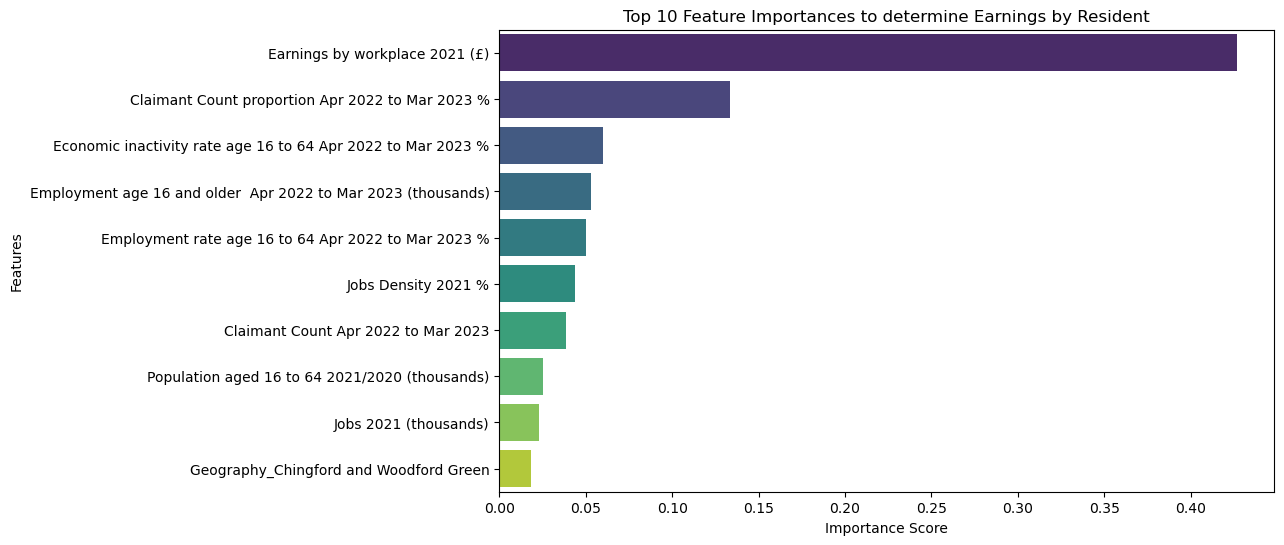

(None, 42.9355)

In [110]:
cleaned_feature_names = []

for col in feature_names:
    # Remove '\n' and text within square brackets
    cleaned_name = col.replace('\n', ' ')  # Replace newline characters with space
    cleaned_name = re.sub(r'\[.*?\]', '', cleaned_name)  # Remove text within square brackets
    cleaned_name = cleaned_name.strip()  # Remove any leading and trailing whitespaces
    cleaned_feature_names.append(cleaned_name)  # Append cleaned name to the new list

# Creating a bar plot for Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_scores, y=cleaned_feature_names, palette="viridis")
plt.title('Top 10 Feature Importances to determine Earnings by Resident')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show(), mae

## Step 4: K-Means Clustering

/Users/cardigan/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/cardigan/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/cardigan/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/cardigan/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

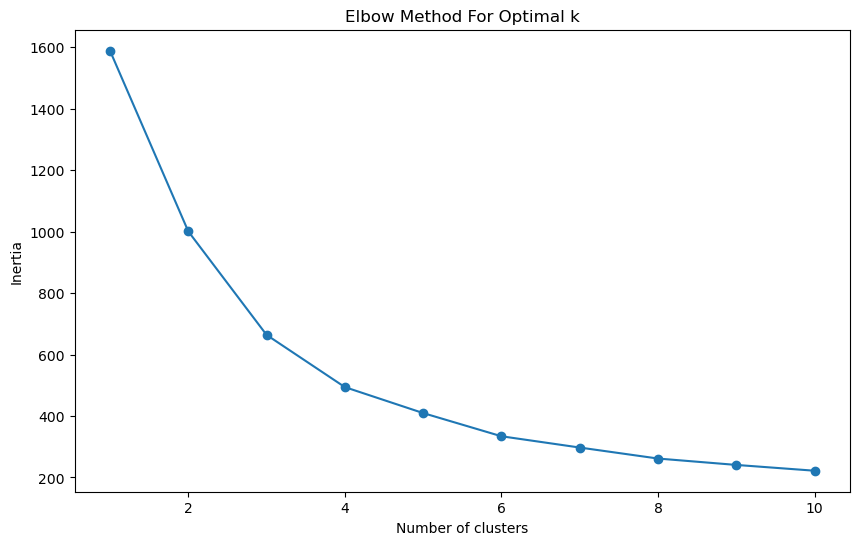

In [136]:
scaler = StandardScaler()
features_for_clustering = [
    'Employment rate\nage 16 to 64\nApr 2022 to Mar 2023\n%\n[note 2]',
    'Economic inactivity rate\nage 16 to 64\nApr 2022 to Mar 2023\n%\n[note 2]',
    'Claimant Count proportion\nApr 2022 to Mar 2023\n%\n[note 4]',
    'Jobs Density\n2021\n%\n[note 5, 6]'
]
employment_data_standardized = scaler.fit_transform(employment_data_clean[features_for_clustering])

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):  # Checking for up to 10 clusters
    kmeans = KMeans(n_init = 10, n_clusters=i, random_state=42)
    kmeans.fit(employment_data_standardized)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [140]:
employment_data_standardized = pd.DataFrame(employment_data_standardized, columns=features_for_clustering)

# Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
employment_data_standardized['cluster'] = kmeans.fit_predict(employment_data_standardized[features_for_clustering])

# Analyzing the characteristics of each cluster
cluster_characteristics = employment_data_standardized.groupby('cluster')[features_for_clustering].mean()
cluster_characteristics

/Users/cardigan/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/cardigan/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/cardigan/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/cardigan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

,Employment rate\nage 16 to 64\nApr 2022 to Mar 2023\n%\n[note 2],Economic inactivity rate\nage 16 to 64\nApr 2022 to Mar 2023\n%\n[note 2],Claimant Count proportion\nApr 2022 to Mar 2023\n%\n[note 4],"Jobs Density\n2021\n%\n[note 5, 6]"
cluster,,,,
0,70.826471,25.729412,4.427451,0.809020
1,81.716471,14.969412,3.124706,0.795765
2,63.623077,31.563462,5.803846,0.751346
3,75.922152,20.494937,3.695570,0.877405


## Step 5: PCA (Principal Component Analysis)

/Users/cardigan/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/cardigan/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/cardigan/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


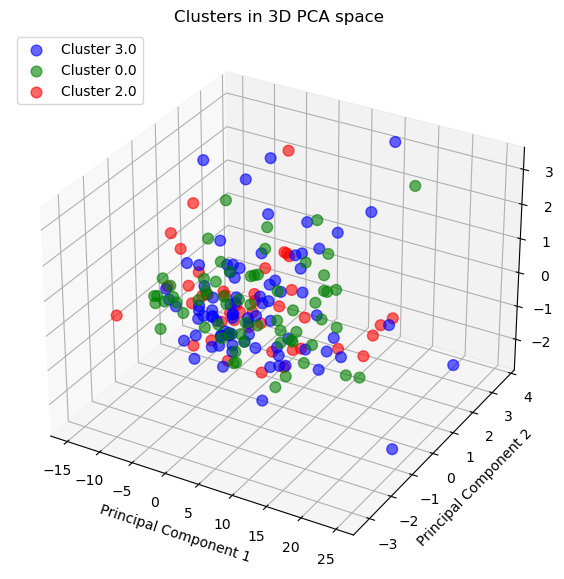

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA for 3 principal components
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(employment_data_standardized[features_for_clustering])

# Create a DataFrame with the principal components and the cluster labels
pc_df_3d = pd.DataFrame(data=principal_components_3d, columns=['PC1', 'PC2', 'PC3'])
pc_df_3d['Cluster'] = employment_data_standardized['cluster']

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = ['b', 'g', 'r']  # Define as many colors as the number of clusters

for cluster, color in zip(pc_df_3d['Cluster'].unique(), colors):
    cluster_data = pc_df_3d[pc_df_3d['Cluster'] == cluster]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], c=color, label=f'Cluster {cluster}', s=60, alpha=0.6)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Clusters in 3D PCA space')
ax.legend(loc='upper left')
plt.show()


## Step 6: Linear Regression

In [146]:
features_for_regression = [
    'Population\naged 16 to 64\n2021/2020\n(thousands)\n[note 1]',
    'Employment\nage 16 and older \nApr 2022 to Mar 2023\n(thousands)\n[note 2]',
    'Unemployment\nage 16 and older\nApr 2022 to Mar 2023\n(thousands)\n[note 2]',
    'Economic inactivity\nage 16 to 64\nApr 2022 to Mar 2023\n(thousands)\n[note 2]',
    'Claimant Count\nApr 2022 to Mar 2023\n[note 4]',
    'Jobs\n2021\n(thousands)\n[note 5]',
    'Earnings by workplace\n2021\n(£)\n[note 7]'
]
X = employment_data_clean[features_for_regression] 
y = employment_data_clean['Earnings by resident\n2021\n(£)\n[note 7]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
predictions = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)

/Users/cardigan/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/cardigan/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/cardigan/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/cardigan/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 